# Data Science Challenge

In [9]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [174]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from statistics import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [129]:
# Dataset is already loaded below
Hotel_data = pd.read_csv("train.csv")

In [130]:
Hotel_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [131]:
#Explore columns
Hotel_data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [132]:
Hotel_data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

In [133]:
#Description
Hotel_data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [134]:
Hotel_data.isnull().sum(axis=0)

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

There are 676 null values in the columns reviews_per_month,around 25% of the values are empty. I will use suitable method to replace null values depending on correlation

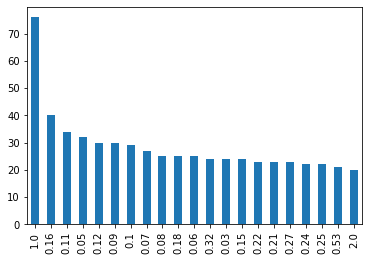

In [135]:
#Visualizing values of reviews_per_month
Hotel_data['reviews_per_month'].value_counts()[:2].plot(kind="bar")

In [136]:
len(Hotel_data['reviews_per_month'].unique())

420

From Analysis of the reviews_per_month feature, we can clearly see that there are 420 unique values and mean reviews_per_month ia at 1.15 and std at 1.35. As the data look skewed I am replacing missing values with median value.

In [137]:
#Replacing null values with the median
Hotel_data['reviews_per_month']=Hotel_data['reviews_per_month'].fillna(Hotel_data['reviews_per_month'].median())

In [138]:
#Rechecking for null values
Hotel_data['reviews_per_month'].isnull().sum(axis=0)

0

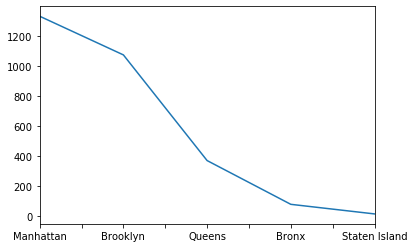

In [139]:
#Visualizing the Region column
Hotel_data['region'].value_counts().plot()

From Analysis of the region feature,we can see that maximum hotels are present in the Manhatten region (1200+) and minimum are present in Bronx and Staten Island

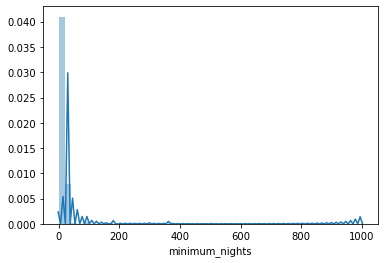

In [140]:
#Visualizing values of minimum_nights
sns.distplot(Hotel_data.minimum_nights)

In [141]:

Hotel_data['minimum_nights'].value_counts()[:5]

1     721
2     657
3     439
30    391
4     180
Name: minimum_nights, dtype: int64

From the graph above we can visualize that, Around 1380 hotels require 2 days of minimum stay and 1997 hotels require  4 days  of miminimum stay. The mean number of nights in 11.5.

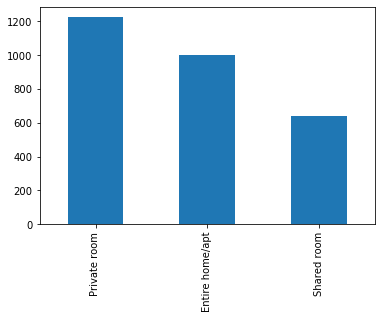

In [142]:
#Visualizing values of accommodation_type
Hotel_data['accommodation_type'].value_counts().plot(kind="bar")

From the graph above we can visualize that, Around 1200 hotels offerred private room while 1000 hotels offerred facility of owning entire apartment or home.

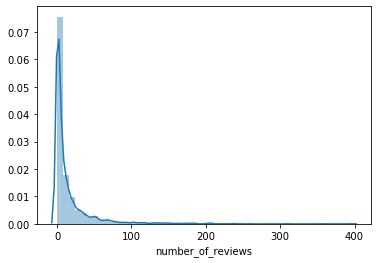

In [143]:
#Visualizing values of number_of_reviews
sns.distplot(Hotel_data.number_of_reviews)

In [144]:
Hotel_data['number_of_reviews'].value_counts()[:5]

0    676
1    300
2    208
3    146
4    120
Name: number_of_reviews, dtype: int64

From the graph above we can visualize that, Around 1400+ hotels have less than 4 number of reviews. The mean number_of_reviews in 16.32.

## Feature Engineering

In [145]:
#Dropping the unwanted columns
Hotel_data_training = Hotel_data.drop(['latitude','longitude','id','owner_id'], axis = 1)

In [146]:
#Converting categorical valus into features with values 0 and 1
Hotel_data_training  = pd.get_dummies(Hotel_data_training, drop_first =True)
Hotel_data_training.head(5)

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,170,5,7,0.56,1,0,0,1,0,0,0,0
1,65,3,238,2.30,1,0,1,0,0,0,0,0
2,85,1,0,0.65,1,1,0,0,1,0,1,0
3,210,30,0,0.65,65,1,0,1,0,0,1,0
4,75,3,38,0.42,3,1,0,1,0,0,0,1


In [147]:
#Checking for correlation between values
Correlation_mat = Hotel_data_training.corr().round(2)
Correlation_mat.head()

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
cost,1.00,0.05,-0.07,-0.10,0.03,0.15,-0.08,0.14,-0.07,0.00,0.13,-0.02
minimum_nights,0.05,1.00,-0.09,-0.11,0.11,0.17,-0.05,0.07,-0.03,-0.01,0.17,-0.05
number_of_reviews,-0.07,-0.09,1.00,0.55,-0.11,-0.19,0.05,-0.03,-0.03,-0.03,-0.18,-0.08
reviews_per_month,-0.10,-0.11,0.55,1.00,-0.10,-0.27,-0.00,-0.02,0.02,0.01,-0.24,-0.02
owned_hotels,0.03,0.11,-0.11,-0.10,1.00,0.19,-0.16,0.21,-0.06,-0.02,0.14,-0.05


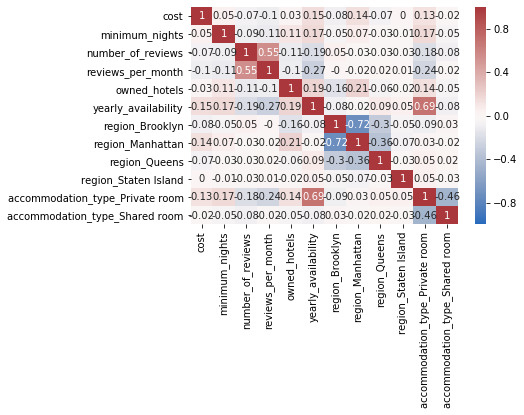

In [148]:
#Visualizing the Correlation matrix
sns.heatmap(Correlation_mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

We can see new columns created for the previous categorical values.

Text(0.5, 1, 'Top 11 Features')

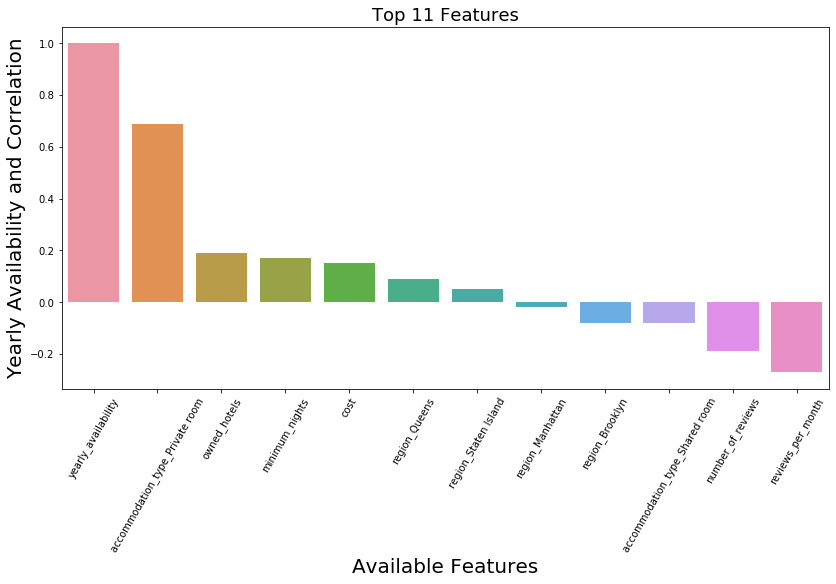

In [149]:
#Creating a copy of correlation matrix for visualization percpective
Correlation_mat_temp=Correlation_mat
#Copying columns names for index
Correlation_mat_temp['Avali_feature'] = Correlation_mat_temp.index

plt.figure(figsize=(12,6))
sns.color_palette("Paired")
sns.barplot(x='Avali_feature',
            y="yearly_availability",  
            order=Correlation_mat_temp.sort_values('yearly_availability', ascending = False).Avali_feature,
            data=Correlation_mat_temp,
           )
plt.xlabel("Available Features", size=20)
plt.ylabel("Yearly Availability and Correlation", size=20)
plt.tight_layout()
plt.xticks(rotation=60)
plt.title("Top 11 Features", size=18)



Interpreting the above correlation matrix we can state that accomodation type private room, owned hotels ad minimum nights have high positive correlation while review_per_month has high
negetive correlation

## Getting test data ready for modelling

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [150]:
#Loading Test data
Hotel_test_data=pd.read_csv('test.csv')
Hotel_test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [151]:
Hotel_test_data.isnull().sum(axis=0)

id                      0
region                  0
latitude                0
longitude               0
accommodation_type      0
cost                    0
minimum_nights          0
number_of_reviews       0
reviews_per_month     173
owner_id                0
owned_hotels            0
dtype: int64

In [152]:
Hotel_test_data['reviews_per_month']=Hotel_test_data['reviews_per_month'].fillna(Hotel_test_data['reviews_per_month'].median())

In [153]:
#Dropping the unwanted columns
Hotel_test_data_fin = Hotel_test_data.drop(['latitude','longitude','id','owner_id'], axis = 1)

In [154]:
#Converting categorical valus into features with values 0 and 1
Hotel_test_data_fin  = pd.get_dummies(Hotel_test_data_fin, drop_first =True)
Hotel_test_data_fin.head(5)

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,135,2,22,0.66,1,1,0,0,0,0,1
1,69,2,8,0.90,2,1,0,0,0,0,0
2,225,30,0,0.67,12,0,1,0,0,1,0
3,125,30,9,0.82,1,0,1,0,0,0,1
4,43,1,13,0.72,2,0,1,0,0,0,0


## Building Models

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

## Implimenting cross validation

In [156]:
##Getting Cross validation variables ready
Hotel_cross_val = KFold(n_splits=10, random_state=1, shuffle=True)

## Logistic Regression

In [157]:
# Using standard code to split data intro train and test and build a pipeline
np.random.seed(85)
X = Hotel_data_training.drop(['yearly_availability'], axis = 1)
y = Hotel_data_training['yearly_availability']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15)

In [179]:
#Building logistic model as the Base
np.random.seed(85)
Hotel_Logistic_model = LogisticRegression()
#Fitting the model
Hotel_Logistic_model.fit(X_train, y_train)

#Predicting the values
Hotel_logregpred = Hotel_Logistic_model.predict(X_test)

#Test accuracy with 10 fold cross validation
Hotel_accuracy_Logreg = accuracy_score(y_test, Hotel_logregpred)
conf_matrix = confusion_matrix(y_test, Hotel_logregpred)
Class_report = classification_report(y_test, Hotel_logregpred)
Hotel_accuracy_logreg_Avg = cross_val_score(Hotel_Logistic_model, X_test, y_test, scoring='accuracy', cv=Hotel_cross_val, n_jobs=-1)

print('10 fold cross validated average accuracy score with logistic regression classifier is: {0:0.4f} percentage'. format(mean(Hotel_accuracy_logreg_Avg)*100))
print('Model accuracy score with K nearest neighbour classifier is: {0:0.4f} percentage'. format(Hotel_accuracy_Logreg*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

10 fold cross validated average accuracy score with logistic regression classifier is: 84.7040 percentage
Model accuracy score with K nearest neighbour classifier is: 86.5429 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       223
           1       0.86      0.86      0.86       208

    accuracy                           0.87       431
   macro avg       0.87      0.87      0.87       431
weighted avg       0.87      0.87      0.87       431

Confusion Matrix : 
[[194  29]
 [ 29 179]]


We got 84.70% accuracy as base line accuracy with 10 fold cross validation



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


Feature: 0, Score: 0.00189
Feature: 1, Score: 0.01881
Feature: 2, Score: 0.00427
Feature: 3, Score: -0.20964
Feature: 4, Score: 0.01870
Feature: 5, Score: -1.32519
Feature: 6, Score: -1.81766
Feature: 7, Score: -0.60408
Feature: 8, Score: 0.27435
Feature: 9, Score: 4.59003
Feature: 10, Score: 2.22304


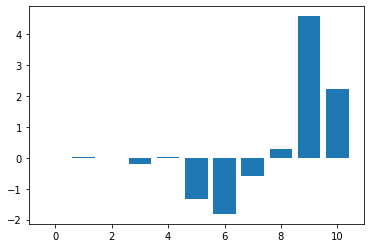

In [160]:
# Getting the importance from the model
imp_factor = Hotel_Logistic_model.coef_[0]
# summarize feature importance
for i,v in enumerate(imp_factor):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(imp_factor))], imp_factor)
plt.show()

# Important Feature for logistic regression
To conclude from the graph accommodation_type_Private room (Feature 9) is important feature and rest are as stated in the graph above.

## KNN

In [161]:
#Using KNN for prediction
np.random.seed(85)
Hotel_knn_model = KNeighborsClassifier(n_neighbors=22)
Hotel_knn_model.fit(X_train, y_train)

#Predicting the values
Hotel_knn_pred = Hotel_knn_model.predict(X_test)

Hotel_accuracy_knn = accuracy_score(y_test, Hotel_knn_pred)
conf_matrix = confusion_matrix(y_test, Hotel_knn_pred)
Class_report = classification_report(y_test, Hotel_knn_pred)

print('Model accuracy score with K nearest neighbour classifier is: {0:0.4f} percentage'. format(Hotel_accuracy_knn*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

Model accuracy score with K nearest neighbour classifier is: 72.6218 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       223
           1       0.79      0.59      0.67       208

    accuracy                           0.73       431
   macro avg       0.74      0.72      0.72       431
weighted avg       0.74      0.73      0.72       431

Confusion Matrix : 
[[191  32]
 [ 86 122]]


In [162]:
#lets see what happens when we variate neighbors for k inrange(1,50):
from sklearn.metrics import mean_absolute_error
k_val=[]
train_accuracy=[]
test_accuracy=[]
list_training_error = []
list_testing_error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = k)
    k_val.append(k)
    knn.fit(X_train, y_train)
    pred_train= knn.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, pred_train))
    pred_test = knn.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, pred_test))
    fold_training_error = mean_absolute_error(y_train, pred_train)
    fold_testing_error = mean_absolute_error(y_test, pred_test)
list_training_error.append(fold_training_error)

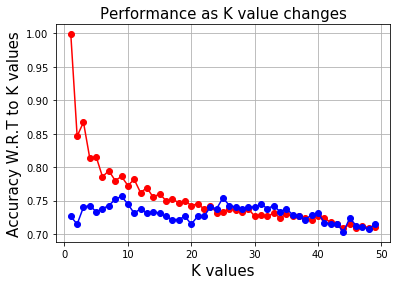

In [163]:
#Plotting train and test errors
np.random.seed(85)
import matplotlib.pyplot as plt
plt.plot(k_val,train_accuracy,color='red',marker='o')
plt.plot(k_val,test_accuracy,color='blue',marker='o')
plt.title('Performance as K value changes', fontsize=15)
plt.xlabel('K values', fontsize=15)
plt.ylabel('Accuracy W.R.T to K values', fontsize=15)
plt.grid(True)
plt.show()

I am choosing k value as  22 as the error rate increases after K=22. Thus in te previous code segment I have taken K value as 20.

## Decision Tree CLassifier

In [164]:
#Decision Tree Classifier with 10 fold cross validation 
np.random.seed(85)
Hotel_dtc = DecisionTreeClassifier()
Hotel_dtc.fit(X_train, y_train)

y_pred_Hotel_dtc = Hotel_dtc.predict(X_test)

Hotel_accuracy_dtc = accuracy_score(y_test, y_pred_Hotel_dtc)
conf_matrix = confusion_matrix(y_test, y_pred_Hotel_dtc)
Class_report = classification_report(y_test, y_pred_Hotel_dtc)
Hotel_accuracy_DT_Avg = cross_val_score(Hotel_dtc, X_test, y_test, scoring='accuracy', cv=Hotel_cross_val, n_jobs=-1)

print('10 fold cross validated average accuracy score with Decision Trees classifier is: {0:0.4f} percentage'. format(mean(Hotel_accuracy_DT_Avg)*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

10 fold cross validated average accuracy score with Decision Trees classifier is: 87.9228 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       223
           1       0.88      0.91      0.89       208

    accuracy                           0.90       431
   macro avg       0.90      0.90      0.90       431
weighted avg       0.90      0.90      0.90       431

Confusion Matrix : 
[[196  27]
 [ 18 190]]


We got accuracy of 72% using decision trees.

## Random Forest CLassifier

In [165]:
#Random forest classifier with 10 fold cross validation
np.random.seed(85)
Hotel_Random_forest_model = RandomForestClassifier()
Hotel_Random_forest_model.fit(X_train, y_train)

y_pred_hotel_RF = Hotel_Random_forest_model.predict(X_test)

Hotel_accuracy_RF = accuracy_score(y_test, y_pred_hotel_RF)
conf_matrix = confusion_matrix(y_test, y_pred_hotel_RF)
Class_report = classification_report(y_test, y_pred_hotel_RF)
Hotel_accuracy_RF_Avg = cross_val_score(Hotel_Random_forest_model, X_test, y_test, scoring='accuracy', cv=Hotel_cross_val, n_jobs=-1)

print('10 fold cross validated average accuracy score with Random forest classifier is: {0:0.4f} percentage'. format(mean(Hotel_accuracy_RF_Avg)*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

10 fold cross validated average accuracy score with Random forest classifier is: 89.0856 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       223
           1       0.90      0.93      0.92       208

    accuracy                           0.92       431
   macro avg       0.92      0.92      0.92       431
weighted avg       0.92      0.92      0.92       431

Confusion Matrix : 
[[201  22]
 [ 14 194]]


We got better accuracy than other models in the Random forest classifier which is 90.2552 percentage.

## Ada Boost CLassifier

In [166]:
# Ada Boost CLassifier
Hotel_ada = AdaBoostClassifier(base_estimator = Hotel_dtc)
np.random.seed(85)
Hotel_ada.fit(X_train, y_train)

y_pred_Hotel_ada = Hotel_ada.predict(X_test)

Hotel_accuracy_ada = accuracy_score(y_test, y_pred_Hotel_ada)
conf_matrix = confusion_matrix(y_test, y_pred_Hotel_ada)
Class_report = classification_report(y_test, y_pred_Hotel_ada)
Hotel_accuracy_ADA_Avg = cross_val_score(Hotel_ada, X_test, y_test, scoring='accuracy', cv=Hotel_cross_val, n_jobs=-1)

print('10 fold cross validated average accuracy score with Ada Boost classifier is: {0:0.4f} percentage'. format(mean(Hotel_accuracy_ADA_Avg)*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

10 fold cross validated average accuracy score with Ada Boost classifier is: 87.6956 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       223
           1       0.86      0.91      0.88       208

    accuracy                           0.88       431
   macro avg       0.88      0.88      0.88       431
weighted avg       0.89      0.88      0.88       431

Confusion Matrix : 
[[191  32]
 [ 18 190]]


## XgBoost Classifier

In [167]:
#The King of classifiers XGBoost is here
np.random.seed(85)
Hotel_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
Hotel_xgb.fit(X_train, y_train)

y_pred_Hotel_xgb = Hotel_xgb.predict(X_test)

Hotel_accuracy_xgb = accuracy_score(y_test, y_pred_Hotel_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_Hotel_xgb)
Class_report = classification_report(y_test, y_pred_Hotel_xgb)

print('Model accuracy score with XG Boost classifier is: {0:0.4f} percentage'. format(Hotel_accuracy_xgb*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

[10:44:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy score with XG Boost classifier is: 91.8794 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       223
           1       0.89      0.95      0.92       208

    accuracy                           0.92       431
   macro avg       0.92      0.92      0.92       431
weighted avg       0.92      0.92      0.92       431

Confusion Matrix : 
[[199  24]
 [ 11 197]]


For some reason the Hackerank system did not allow me to impliment the Cross validation for XGBoost, so I am just printing the normal accuracy. Normal Accuracy for the XGBoost CLassifier is 91.87.

## Cat Boost classifier

In [168]:
#Implimenting Cat Boost classifier with cross validation
np.random.seed(85)
Hotel_cat = CatBoostClassifier(iterations=200,silent=True)
Hotel_cat.fit(X_train, y_train)

y_pred_Hotelcat = Hotel_cat.predict(X_test)

Hotel_accuracy_cat = accuracy_score(y_test, y_pred_Hotelcat)
conf_matrix = confusion_matrix(y_test, y_pred_Hotelcat)
Class_report = classification_report(y_test, y_pred_Hotelcat)
Hotel_accuracy_cat_Avg = cross_val_score(Hotel_cat, X_test, y_test, scoring='accuracy', cv=Hotel_cross_val, n_jobs=-1)


print(' 10 fold cross validated average accuracy score with Cat Boost classifier is: {0:0.4f} percentage'. format(mean(Hotel_accuracy_cat_Avg)*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

 10 fold cross validated average accuracy score with Cat Boost classifier is: 91.1786 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       223
           1       0.91      0.96      0.94       208

    accuracy                           0.94       431
   macro avg       0.94      0.94      0.94       431
weighted avg       0.94      0.94      0.94       431

Confusion Matrix : 
[[204  19]
 [  8 200]]


CatBoost classifier is an algorithm for gradient boosting on decision trees. It has given excellent accuracy for our model. The accuracy is 93.03.

## LGBM CLassfier

In [170]:
#Implimenting LGBM classifier
np.random.seed(85)
Hotel_lgbm = LGBMClassifier(learning_rate = 1)
Hotel_lgbm.fit(X_train, y_train)

y_pred_Hotellgbm = Hotel_cat.predict(X_test)

Hotel_accuracy_lgbm = accuracy_score(y_test, y_pred_Hotellgbm)
conf_matrix = confusion_matrix(y_test, y_pred_Hotellgbm)
Class_report = classification_report(y_test, y_pred_Hotellgbm)



print(' Accuracy score with Cat Boost classifier is: {0:0.4f} percentage'. format(Hotel_accuracy_lgbm*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

 10 fold cross validated average accuracy score with Cat Boost classifier is: 93.7355 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       223
           1       0.91      0.96      0.94       208

    accuracy                           0.94       431
   macro avg       0.94      0.94      0.94       431
weighted avg       0.94      0.94      0.94       431

Confusion Matrix : 
[[204  19]
 [  8 200]]


##  Implimenting Voting Classifier to aggregate the final model


In [176]:
warnings.filterwarnings('ignore')
#Building the Hotel voting Classifier
Hotel_classifiers = [ ('Cat Boost Classifier', Hotel_cat), ('XGboost Classifier', Hotel_xgb),  
               ('LGBM CLassifier', Hotel_lgbm), ('Decision Tree Classifier', Hotel_dtc),('Random Forest Classifier', Hotel_Random_forest_model), ('Ada Boost Classfier', Hotel_ada), ('Logistic Regression', Hotel_Logistic_model),
               ('Knn classifier', Hotel_knn_model)]
Hotel_vot_cls = VotingClassifier(estimators = Hotel_classifiers)
Hotel_vot_cls.fit(X_train, y_train)

y_pred_vot_cls = Hotel_cat.predict(X_test)

Hotel_accuracy_vot_lcs = accuracy_score(y_test, y_pred_vot_cls)
conf_matrix = confusion_matrix(y_test, y_pred_vot_cls)
Class_report = classification_report(y_test, y_pred_vot_cls)




print(' Accuracy score with Cat Boost classifier is: {0:0.4f} percentage'. format(Hotel_accuracy_vot_lcs*100))

print(f"Classification Report : \n{Class_report}")

print(f"Confusion Matrix : \n{conf_matrix}")

[10:47:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Accuracy score with Cat Boost classifier is: 93.7355 percentage
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       223
           1       0.91      0.96      0.94       208

    accuracy                           0.94       431
   macro avg       0.94      0.94      0.94       431
weighted avg       0.94      0.94      0.94       431

Confusion Matrix : 
[[204  19]
 [  8 200]]


In [ ]:
#Building data frame with accuracy to visualize the given evaluation Metric Accuracy
Hotel_models = pd.DataFrame({
    'Hotel Model' : ['Logisitc Regression CLassifier','Cat Boost Classifier', 'KNN classfier', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'XgBoost',  'LGBM Classifier', 'Voting Classifier'],
    'Model Score' : [Hotel_accuracy_logreg_Avg,Hotel_accuracy_cat, Hotel_accuracy_knn, Hotel_accuracy_dtc, Hotel_accuracy_RF_Avg, Hotel_accuracy_ADA_Avg, Hotel_accuracy_xgb, Hotel_accuracy_lgbm,  Hotel_accuracy_vot_lcs]
})


Hotel_models.sort_values(by = 'Model Score', ascending = False)

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [57]:
# Combining prediction resultsfrom XGBoost with IDs
Hotelpred_list = list(Hotel_xgb.predict(Hotel_test_data_fin))
#Creating Column Hotel_pred_id based on the model built
Hotel_pred_id = list(Hotel_test_data['id'])
#Final Creation of df
Hotel_df = pd.DataFrame(list(zip(Hotelpred_list,Hotel_pred_id )), columns = ['id','yearly_availability'])

In [58]:
#Submitting the results
Hotel_df.to_csv('submissions.csv',index=False)

---